# ABEL plasma-lens tracking example

By Carl A. Lindstrøm and Pierre Drobniak (University of Oslo), 27 May 2024

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the experiment and beam

In [2]:
# define beam
source = SourceBasic()
source.charge = -100e-12 # [pC]
source.energy = 5e6 # [eV]
source.rel_energy_spread = 0.01
source.bunch_length = 400e-6 # [m]
source.emit_nx, source.emit_ny = 5e-6, 5e-6 # [m rad]
source.beta_x = 10
source.beta_y = source.beta_x
source.num_particles = 10000
source.length = 3 # [m]
source.jitter.x = 100e-6
source.jitter.y = 100e-6
source.jitter.xp = 0.01e-3
source.jitter.yp = 0.01e-3

# define the RF accelerator
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = 200e6 # [eV]
rf_accelerator.length = 200 # [m]

# define the BDS
bds = BeamDeliverySystemBasic()
bds.beta_x = 0.2 # [m]
bds.beta_y = 0.2 # [m]
bds.length = 5 # [m]

# define linac
linac = ConventionalLinac()
linac.source = source
linac.rf_accelerator = rf_accelerator
linac.bds = bds

# define the plasma lens
plasma_lens = PlasmaLensNonlinearThin()
plasma_lens.length = 0.02 # [m]
plasma_lens.current = -1000 # [A]
plasma_lens.radius = 500e-6 # [m]
plasma_lens.rel_nonlinearity = -0.2

# define the spectrometer
spectrometer = SpectrometerBasicCLEAR()
spectrometer.use_otr_screen = True

# assemble 
experiment = ExperimentAPL()
experiment.linac = linac
experiment.plasma_lens = plasma_lens
experiment.spectrometer = spectrometer

In [3]:
# scan the driver timing jitter
experiment.run('plasmalens_run_example', num_shots=10, parallel=False, overwrite=True);

>> SHOT 1/10
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.0 GeV, Q = -0.10 nC, σz = 398.5 µm, σE =  1.0%, ε =   5.0/5.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  203.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 398.5 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #2  BeamDeliverySystemBasic (s =  208.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 398.5 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #3  PlasmaLensNonlinearThin (s =  208.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 398.5 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #4  SpectrometerBasicCLEAR  (s =  208.3 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 398.5 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
>> SHOT 2/10
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.0 GeV, Q = -0.10 nC, σz = 406.2 µm, σE =  1.0%, ε =   5.0/5.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  203.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 406.2 µm, σE =  0.0%, ε =   5.0/5.0 mm-mrad
    ... #2  BeamDeliverySystemBasic (s =  2

In [4]:
# scan the driver timing jitter
experiment.scan('plasmalens_scan_example', 
            lambda obj, val: setattr(obj.plasma_lens, 'offset_x', 0) or setattr(obj.plasma_lens, 'offset_y', val) or obj,
           np.linspace(-0.9*plasma_lens.radius, 0.9*plasma_lens.radius, 11),
           label='Plasma lens offset, vertical (um)',
           scale=1e-6,
           num_shots_per_step=3,
           parallel=False,
           overwrite=True);

>> SHOT 1/33
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.0 GeV, Q = -0.10 nC, σz = 399.6 µm, σE =  1.0%, ε =   5.0/4.9 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  203.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 399.6 µm, σE =  0.0%, ε =   5.0/4.9 mm-mrad
    ... #2  BeamDeliverySystemBasic (s =  208.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 399.6 µm, σE =  0.0%, ε =   5.0/4.9 mm-mrad
    ... #3  PlasmaLensNonlinearThin (s =  208.0 m) :   E =   0.2 GeV, Q = -0.08 nC, σz = 400.6 µm, σE =  0.0%, ε =   5.8/5.0 mm-mrad
    ... #4  SpectrometerBasicCLEAR  (s =  208.3 m) :   E =   0.2 GeV, Q = -0.08 nC, σz = 400.6 µm, σE =  0.0%, ε =   5.8/5.0 mm-mrad
>> SHOT 2/33
Tracked #0  SourceBasic             (s =    3.0 m) :   E =   0.0 GeV, Q = -0.10 nC, σz = 401.4 µm, σE =  1.0%, ε =   5.0/5.1 mm-mrad
    ... #1  RFAcceleratorBasic      (s =  203.0 m) :   E =   0.2 GeV, Q = -0.10 nC, σz = 401.4 µm, σE =  0.0%, ε =   5.0/5.1 mm-mrad
    ... #2  BeamDeliverySystemBasic (s =  2

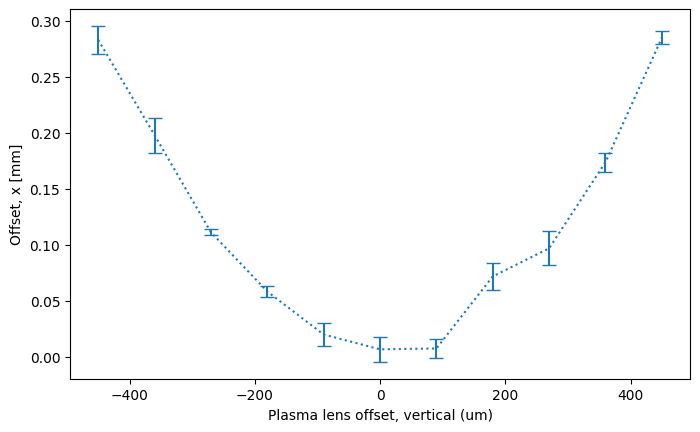

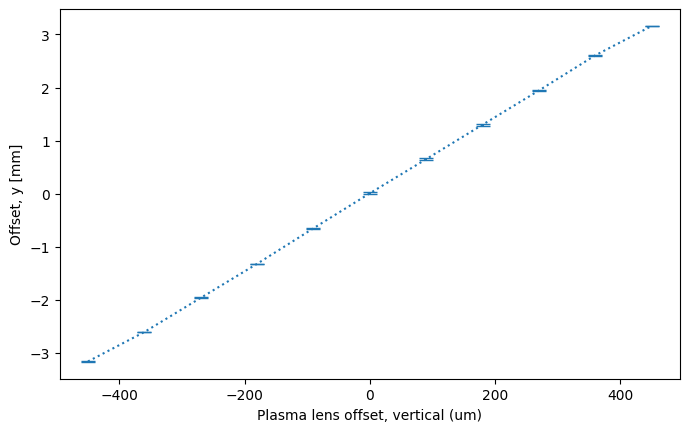

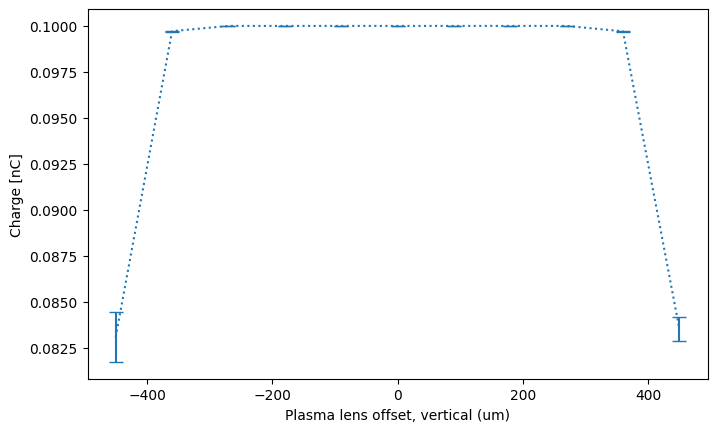

In [5]:
experiment.plot_offset_x()
experiment.plot_offset_y()
experiment.plot_charge()

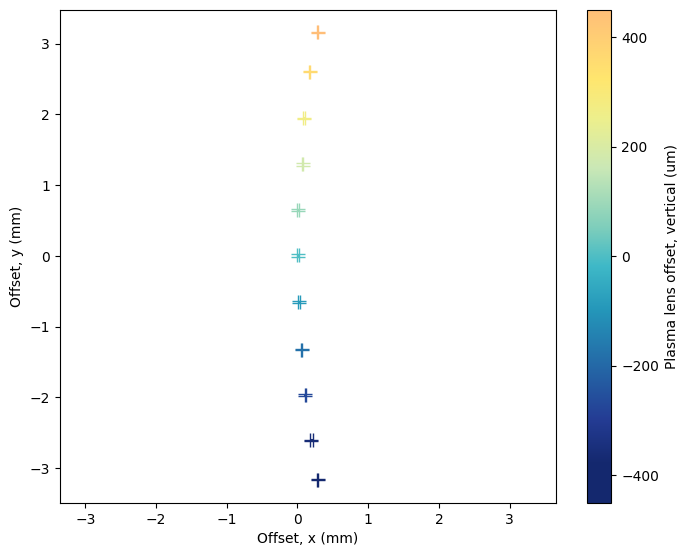

In [6]:
experiment.plot_correlation_offsets()